In [16]:
import json, re, string
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
import nltk

In [17]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array
import numpy as np
import tqdm

In [18]:
df_news = pd.read_csv('assets/berita.csv')
print(df_news)

                                                 judul
0    Hakim PN Surabaya "Ngamuk" Saat KPK Umumkan Te...
1    Hakim Itong, Panitera dan Pengacara yang Terja...
2    Sejumlah Titik di Tegal Alur Masih Banjir, Pen...
3    Dari 1.000 KK, Hanya 15 Keluarga Korban Banjir...
4    Pertanyakan Progres Laporannya, Korban Penipua...
..                                                 ...
130  SMAN 6 Jakarta Kembali Gelar PTM Setelah Dihen...
131  Fraksi PDI-P Panggil Arteria Soal Ucapan Copot...
132  Jadi Calon Pangkostrad, I Nyoman Cantiasa Eks ...
133  2,1 Juta Anak Divaksinasi melalui Program Vaks...
134  Minta Maaf Setelah Diprotes Masyarakat Sunda, ...

[135 rows x 1 columns]


In [19]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data
 
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

In [20]:
for index in range (len(df_news["judul"])):
  df_news["judul"].iloc[index] = case_folding(df_news["judul"].iloc[index])
  df_news["judul"].iloc[index] = word_tokenize(df_news["judul"].iloc[index])
  df_news["judul"].iloc[index] = stopword_cleaner(df_news["judul"].iloc[index])

In [21]:
data_berita = [berita.split() for berita in df_news["judul"]]
data_berita

[['hakim',
  'pn',
  'surabaya',
  'ngamuk',
  'kpk',
  'umumkan',
  'tersangka',
  'omong',
  'kosong'],
 ['hakim',
  'itong',
  'panitera',
  'pengacara',
  'terjaring',
  'ott',
  'pn',
  'surabaya',
  'tersangka'],
 ['titik', 'tegal', 'alur', 'banjir', 'penyedotan', 'air', 'malam'],
 ['kk', 'keluarga', 'korban', 'banjir', 'kecamatan', 'benda', 'mengungsi'],
 ['progres',
  'laporannya',
  'korban',
  'penipuan',
  'apartemen',
  'jaksel',
  'datangi',
  'polda',
  'metro',
  'jaya'],
 ['ri',
  'kecam',
  'aksi',
  'israel',
  'gusur',
  'permukiman',
  'warga',
  'palestina',
  'sheikh',
  'jarah'],
 ['kecamatan', 'benda', 'dirikan', 'dapur', 'warga', 'terdampak', 'banjir'],
 ['omicron',
  'jakarta',
  'wagub',
  'dki',
  'imbau',
  'masyarakat',
  'rumah',
  'mendesak'],
 ['satgas', 'covid', 'varian', 'indonesia', 'terkendali'],
 ['habiskan',
  'stok',
  'pedagang',
  'pasar',
  'slipi',
  'jual',
  'minyak',
  'goreng',
  'rp',
  'liter'],
 ['kpk',
  'sayangkan',
  'rahmat',
  'ef

In [22]:
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [23]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(
    random_state=100,
    chunksize=100,
    per_word_topics=True,
    corpus = doc_term_matrix, 
    num_topics=5, 
    id2word = dictionary, 
    passes=50
    )

In [24]:
from pprint import pprint
pprint(ldamodel.print_topics())

[(0,
  '0.037*"sunda" + 0.021*"maaf" + 0.016*"vaksinasi" + 0.014*"kajati" + '
  '0.014*"berbahasa" + 0.012*"vaksin" + 0.012*"pelaku" + 0.011*"bekasi" + '
  '0.011*"arteria" + 0.009*"booster"'),
 (1,
  '0.040*"arteria" + 0.031*"dahlan" + 0.028*"pdi" + 0.028*"p" + 0.024*"kpk" + '
  '0.019*"ott" + 0.018*"fraksi" + 0.014*"korban" + 0.013*"banjir" + '
  '0.012*"mobil"'),
 (2,
  '0.021*"covid" + 0.018*"pasien" + 0.017*"kemenlu" + 0.016*"wisma" + '
  '0.016*"atlet" + 0.015*"bertambah" + 0.013*"wni" + 0.013*"ditangkap" + '
  '0.013*"update" + 0.013*"orang"'),
 (3,
  '0.031*"covid" + 0.022*"jakarta" + 0.019*"polisi" + 0.015*"pelat" + '
  '0.015*"masyarakat" + 0.013*"nomor" + 0.009*"sman" + 0.009*"minyak" + '
  '0.009*"goreng" + 0.009*"malaysia"'),
 (4,
  '0.019*"angelo" + 0.019*"bruder" + 0.019*"dki" + 0.017*"penjara" + '
  '0.017*"prabowo" + 0.014*"wagub" + 0.012*"divonis" + 0.012*"dishub" + '
  '0.011*"pelaku" + 0.011*"cabul"')]


In [25]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_berita, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5176561072339286


In [26]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [27]:
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [08:59<00:00,  1.00it/s]


In [28]:
df_tuning_result = pd.read_csv("assets/lda_tuning_results_model_1.csv")
display(df_tuning_result)

FileNotFoundError: [Errno 2] No such file or directory: 'assets/lda_tuning_results_model_1.csv'

<AxesSubplot:xlabel='Topics'>

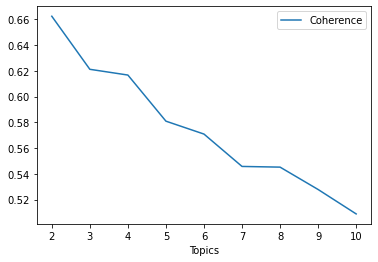

In [ ]:
df_plot = df_tuning_result[(df_tuning_result.Alpha == "0.01") & (df_tuning_result.Beta == "0.31") & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

In [ ]:
df_plot_2 = df_tuning_result[(df_tuning_result.Topics == 2) & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
271,100% Corpus,2,0.01,0.31,0.662292
270,100% Corpus,2,0.01,0.01,0.646363
274,100% Corpus,2,0.01,symmetric,0.645168
283,100% Corpus,2,0.61,0.9099999999999999,0.645070
276,100% Corpus,2,0.31,0.31,0.641279
284,100% Corpus,2,0.61,symmetric,0.640221
292,100% Corpus,2,symmetric,0.61,0.638450
282,100% Corpus,2,0.61,0.61,0.635745
294,100% Corpus,2,symmetric,symmetric,0.633880
275,100% Corpus,2,0.31,0.01,0.633487


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=2, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.01)
 
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.013*"kemenlu" + 0.011*"kpk" + 0.009*"banjir" + 0.009*"tersangka" + '
  '0.009*"rp" + 0.007*"covid" + 0.007*"bupati" + 0.007*"pelaku" + '
  '0.007*"malaysia" + 0.007*"sekolah"'),
 (1,
  '0.024*"covid" + 0.016*"arteria" + 0.012*"korban" + 0.012*"banjir" + '
  '0.011*"dahlan" + 0.011*"mobil" + 0.011*"update" + 0.009*"warga" + '
  '0.009*"januari" + 0.009*"p"')]


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

/home/sofi/anaconda3/envs/py37/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.094675  0.0       1        1  60.347279
0     -0.094675  0.0       2        1  39.652721, topic_info=         Term      Freq      Total Category  logprob  loglift
25     korban  6.000000   6.000000  Default  30.0000  30.0000
86    kemenlu  5.000000   5.000000  Default  29.0000  29.0000
153    bupati  2.000000   2.000000  Default  28.0000  28.0000
346   sekolah  2.000000   2.000000  Default  27.0000  27.0000
161  malaysia  2.000000   2.000000  Default  26.0000  26.0000
..        ...       ...        ...      ...      ...      ...
198   arteria  2.258181  10.894711   Topic2  -5.2707  -0.6487
57      covid  2.258180  14.712843   Topic2  -5.2707  -0.9492
45      warga  1.579385   7.157548   Topic2  -5.6283  -0.5861
144    vaksin  1.575933   2.576191   Topic2  -5.6305   0.4335
96      hasil  1.575933   2.576191   Topic2  -5.6305   0.4335

[126 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
188       1  1.012460    adat
639       2  1.103353  ajukan
117       1  1.095284  akibat
189       1  1.012460    aman
241       1  0.716875  angelo
...     ...       ...     ...
45        1  0.838276   warga
45        2  0.279425   warga
82        1  1.095284   wisma
214       1  0.303897     wni
214       2  0.607794     wni

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])